In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import os
import json
from pandas.io.json import json_normalize


In [3]:
pip install tsfresh

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tsfresh

In [5]:
from tsfresh.examples.har_dataset import download_har_dataset, load_har_dataset, load_har_classes
from tsfresh import extract_features, extract_relevant_features, select_features
from  tsfresh.feature_extraction  import  extract_features 

In [6]:
data_folder = 'C:/Users/Svetlana/Documents/flink_metric_data_new/'
folder = []
for i in os.walk('C:/Users/Svetlana/Documents/flink_metric_data_new'):
    folder.append(i)
    

In [7]:
common_df = pd.DataFrame(columns = ['name', 'max', 'min', 'range', 'coef_var', 'num_peaks1', 'num_peaks2', 'len'])

In [8]:
common_df.head()

,name,max,min,range,coef_var,num_peaks1,num_peaks2,len


In [9]:
row_list=[]


In [10]:
print(row_list)

[]


In [11]:
dict1={}

In [12]:
data_folder = 'C:/Users/Svetlana/Documents/flink_metric_data_new/'
with open(f"{data_folder}10h4id8fd1ii4477diifdd5d3iig9596_15360_129942_read_records_per_second.json") as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
    df.drop('unit',axis=1,inplace=True)

In [13]:
tsfresh.feature_extraction.feature_calculators.number_peaks(df.average, 40)

24

In [209]:
print(dict1)

{'name': 'i8e28d444g2144i0d94384efd5802gfd_17009_206351_read_records_per_second.json', 'max': 0, 'min': 0, 'range': 0, 'coef_var': -1, 'len': 1999, 'single_pick': 0}


In [15]:
for address, dirs, files in folder:
    for file in files:
        with open(address+'/'+file) as f:
            data = json.load(f)
            df = pd.DataFrame(data['datapoints'])
            df.drop('unit',axis=1,inplace=True)
            df = df.set_index(['timestamp'])
            df.index = pd.to_datetime(df.index, unit='ms')
            df_mean=pd.DataFrame()
            df_mean['average'] = df.average.resample('30T').sum()
            dict1 ={}
            coef_variation = -1
            if (df_mean['average'].mean()!=0):
                coef_variation=df_mean['average'].std()/df_mean['average'].mean()
            dict1.update({'name':file,'max': df_mean['average'].max(), 
                    'min': df_mean['average'].min(),
                    'range':df_mean['average'].max()-df_mean['average'].min(),
                    'coef_var': coef_variation,
                    #'num_peaks1': tsfresh.feature_extraction.feature_calculators.number_peaks(df_mean.average, 5),
                         'len': len(df),
                         'single_pick': tsfresh.feature_extraction.feature_calculators.number_peaks(df.average,1000)})
            row_list.append(dict1)
common_df = pd.DataFrame(row_list) 


      

In [208]:
common_df.head(20)

,name,max,min,range,coef_var,len,single_pick
0,055gid303e800ie30i16f01hf47fe6f0_8708_202317_r...,0.00,0.00,0.00,-1.000000,2017,0
1,055gid303e800ie30i16f01hf47fe6f0_8708_202317_w...,0.00,0.00,0.00,-1.000000,2017,0
2,10h4id8fd1ii4477diifdd5d3iig9596_15360_129942_...,54629.51,4288.55,50340.96,0.380349,2017,0
3,10h4id8fd1ii4477diifdd5d3iig9596_15360_129942_...,54655.37,4290.59,50364.78,0.380330,2017,0
4,10h4id8fd1ii4477diifdd5d3iig9596_15360_130545_...,24342.99,3429.66,20913.33,0.066767,2017,0
5,10h4id8fd1ii4477diifdd5d3iig9596_15360_130545_...,24341.42,3429.52,20911.90,0.066759,2017,0
6,10h4id8fd1ii4477diifdd5d3iig9596_15360_149764_...,806.71,127.28,679.43,0.182366,2017,0
7,10h4id8fd1ii4477diifdd5d3iig9596_15360_149764_...,806.70,127.34,679.36,0.182387,2017,0
8,10h4id8fd1ii4477diifdd5d3iig9596_15360_149765_...,115.44,18.48,96.96,0.176857,2017,0
9,10h4id8fd1ii4477diifdd5d3iig9596_15360_149765_...,115.44,18.48,96.96,0.176841,2017,0


In [206]:
common_df.single_pick.value_counts()

0    785
1      5
Name: single_pick, dtype: int64

In [207]:
common_df.len.value_counts()

2017    733
1236     18
642      12
2016      8
2011      8
2012      3
1908      2
1819      2
312       2
2010      1
1999      1
Name: len, dtype: int64

In [ ]:
commo

плохих данных(длиной не 2017) всего 57, еще плохие данные это те, которые имеют один пик, а на всем остальном промежутке почти константа, таких джоб 5

In [19]:
one_pick=common_df[common_df['single_pick']==1]

In [210]:
one_pick

,name,max,min,range,coef_var,len,single_pick
438,i2ge571fe6h9451i82f6e2134i9hhhi4_10625_95182_r...,3937.42,71.37,3866.05,0.828242,2017,1
446,i2ge571fe6h9451i82f6e2134i9hhhi4_12890_129858_...,9.93,0.00,9.93,0.997222,2017,1
462,i2ge571fe6h9451i82f6e2134i9hhhi4_15114_146190_...,9.96,0.00,9.96,0.997143,2017,1
478,i6dg8515940i42f488h927if637d56i4_13438_130597_...,18.02,1.25,16.77,0.357434,2017,1
479,i6dg8515940i42f488h927if637d56i4_13438_130597_...,18.02,1.25,16.77,0.357254,2017,1


In [251]:
s=common_df.at[657, 'name']

In [252]:
with open(f"{data_folder}"+'/'+s) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
    df.drop('unit',axis=1,inplace=True)
    df = df.set_index(['timestamp'])
    df.index = pd.to_datetime(df.index, unit='ms')

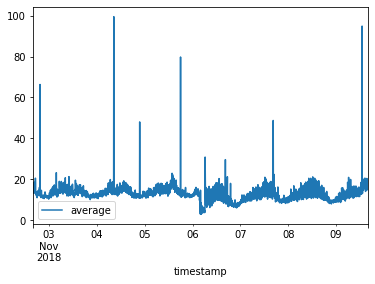

In [253]:
df.plot()

In [49]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [50]:
ex_sm=exponential_smoothing(df.average, 0.2)

In [202]:
plt.close()

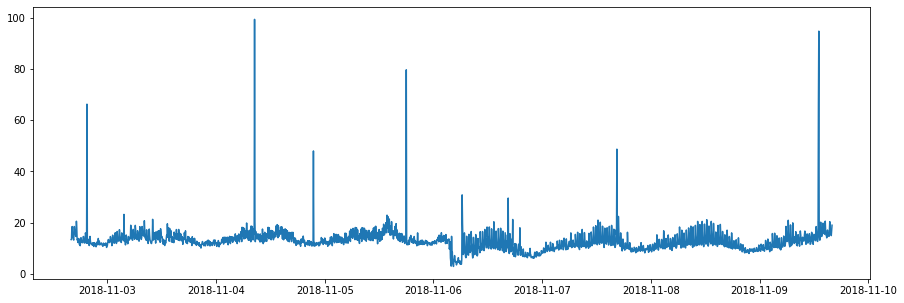

In [254]:
plt.figure(figsize=(15,5))
plt.plot(df, label="Actual values")
#plt.plot(ex_sm, label="exponential smoothing")
#plt.legend(loc="best")

проверим как ресемплинг влияет на точность предсказаний

для начала исходная джоба с шагом 5 минут и простое экспоненциальное сглаживание

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

C:\Users\Svetlana\anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


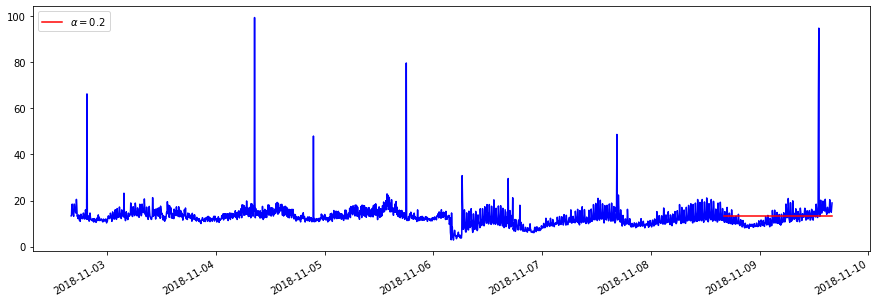

In [255]:
plt.figure(figsize=(15,5))
fit = SimpleExpSmoothing(df.average[0:1729]).fit(smoothing_level=0.2,optimized=False)
pred = fit.forecast(288).rename(r'$\alpha=0.2$')
plt.plot(df, label="Actual values", color='blue')
pred.plot(color='red', legend=True)
#fit1.fittedvalues.plot(color='blue')


In [105]:
from sklearn.metrics import mean_squared_error

In [280]:
mean_squared_error(df.average[1729:2017], pred)-df.max()

average   -57.86606
dtype: float64

In [257]:
df_resample_15T = pd.DataFrame()
df_resample_15T['average'] = df.average.resample('15T').sum()

In [258]:
len(df_resample_15T)

673

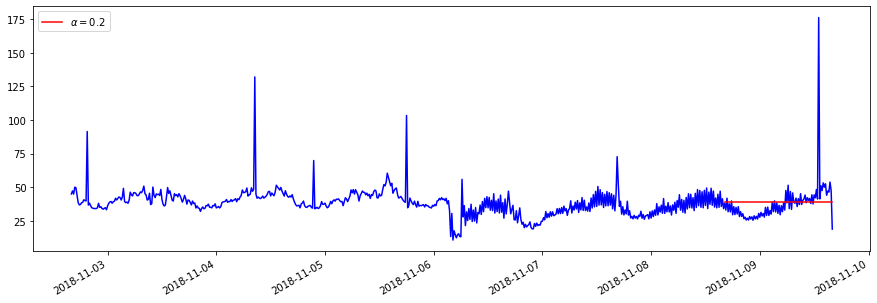

In [259]:
plt.figure(figsize=(15,5))
fit1 = SimpleExpSmoothing(df_resample_15T.average[0:577]).fit(smoothing_level=0.2,optimized=False)
pred1 = fit1.forecast(96).rename(r'$\alpha=0.2$')
plt.plot(df_resample_15T, label="Actual values", color='blue')
pred1.plot( color='red', legend=True)

In [279]:
mean_squared_error(df_resample_15T.average[577:], pred1)-df_resample_15T.max()

average    85.081271
dtype: float64

In [261]:
df_resample_30T = pd.DataFrame()
df_resample_30T['average'] = df.average.resample('30T').sum()

In [262]:
len(df_resample_30T)

337

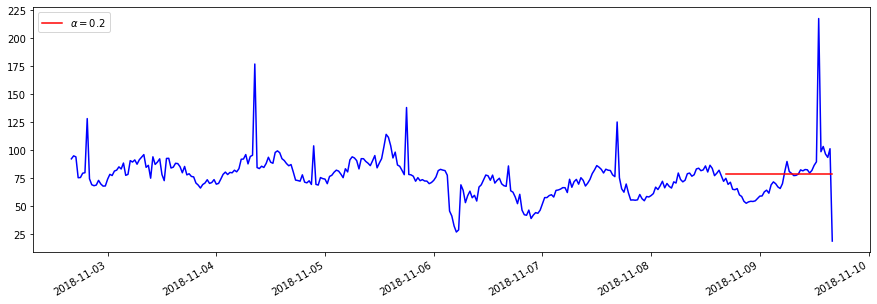

In [263]:
plt.figure(figsize=(15,5))
fit2 = SimpleExpSmoothing(df_resample_30T.average[0:289]).fit(smoothing_level=0.2,optimized=False)
pred2 = fit2.forecast(48).rename(r'$\alpha=0.2$')
plt.plot(df_resample_30T, label="Actual values", color='blue')
pred2.plot( color='red', legend=True)

In [278]:
mean_squared_error(pred2,df_resample_30T[289:337])-df_resample_30T.max()

average    469.778797
dtype: float64

In [265]:
df_resample_60T = pd.DataFrame()
df_resample_60T['average'] = df.average.resample('60T').sum()

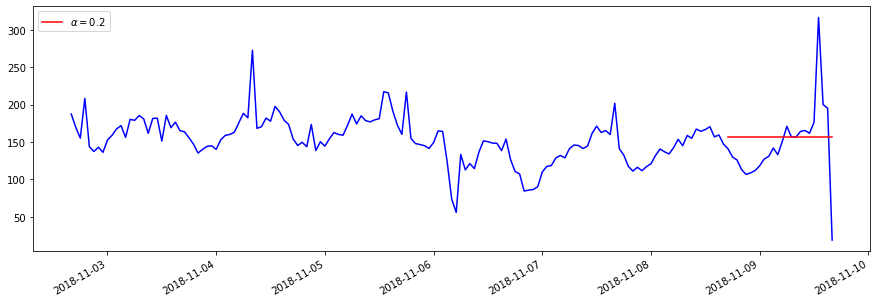

In [266]:
plt.figure(figsize=(15,5))
fit3 = SimpleExpSmoothing(df_resample_60T.average[0:145]).fit(smoothing_level=0.2,optimized=False)
pred3 = fit3.forecast(24).rename(r'$\alpha=0.2$')
plt.plot(df_resample_60T, label="Actual values", color='blue')
pred3.plot( color='red', legend=True)

In [277]:
mean_squared_error(pred3,df_resample_60T[145:169])-df_resample_60T.max()

average    2298.374725
dtype: float64

In [268]:
df_resample_90T = pd.DataFrame()
df_resample_90T['average'] = df.average.resample('90T').sum()

In [190]:
len(df_resample_90T)

113

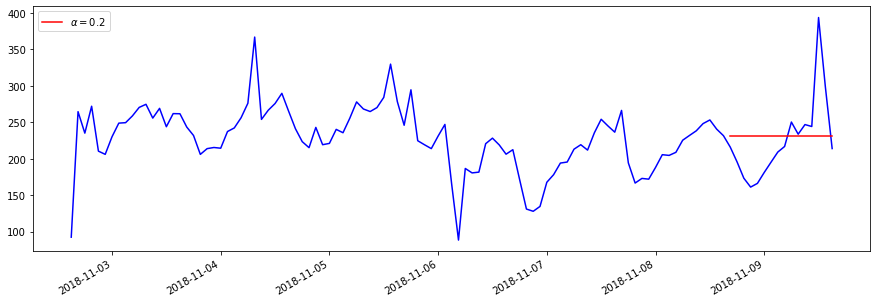

In [269]:
plt.figure(figsize=(15,5))
fit4 = SimpleExpSmoothing(df_resample_90T.average[0:97]).fit(smoothing_level=0.2,optimized=False)
pred4 = fit4.forecast(16).rename(r'$\alpha=0.2$')
plt.plot(df_resample_90T, label="Actual values", color='blue')
pred4.plot( color='red', legend=True)

In [276]:
mean_squared_error(pred4,df_resample_90T[97:113])-df_resample_90T.max()

average    2769.995092
dtype: float64

MSE с каждым ресемплингом становится больше

попробуем ARIMA

In [281]:
from statsmodels.tsa.arima_model import ARIMA

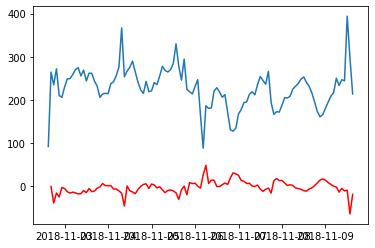

In [291]:
model = ARIMA(df_resample_90T, order=(1,1,2))
results = model.fit(disp=False)
plt.plot(df_resample_90T)
plt.plot(results.fittedvalues, color='red')

In [292]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_resample_90T.average)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.434501
p-value: 0.000003


p<<0,05 следовательно нулевая гипотеза о нестационарности ряда отвергается - ряд СТАЦИОНАРНЫЙ

In [296]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf